# <font color = "#4477AA" >Diabetes Health Indicators 

<font color = "#4477AA" ><b><h1>Introduction</h1></b>

* **Key Study:** Diabetes among Children, analysis of the main causes and factors.

* **Goal:** To make a qualitative data analysis and build an effective machine learning model to predict the status of human diabetes according to specified parameters. 

`df1` => **diabetes_012_health_indicators_BRFSS2021.csv** is a clean dataset of 236,378 survey responses to the CDC's BRFSS2021. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables.

`df2` => **diabetes_binary_5050split_health_indicators_BRFSS2021.csv** is a clean dataset of 67,136 survey responses to the CDC's BRFSS2021. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

`df3` => **diabetes_binary_health_indicators_BRFSS2021.csv** is a clean dataset of 236,378 survey responses to the CDC's BRFSS2021. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

<font color = "#4477AA" ><b><h2><center> Diabetes Health Indicators Dataset Features Explanation</center> </h2></b> 
    
|S.No|Assigned Code|Attribute|Type of Data|Unit|
|----|-------------|---------|------------|----|
|1|**Diabetes_binary**|Presence - absence of diabetes|Binary|Present (1) - Absent (0)|
|2|**HighBP**|High blood pressure|Binary|Present (1) - Absent (0)|
|3|**HighChol**|High cholesterol|Binary|present (1) - absent (0) |
|4|**CholCheck**|cholesterol check |Binary|Checked (1) - not (0)|
|5|**BMI**|Body Mass Index|Numeric| Numbers|
|6|**Smoker**|smoking status|Binary|1 for smokers - 0 for non-smokers|
|7|**Stroke**|History of stroke|Binary| Present (1) - Absent (0) |
|8|**HeartDiseaseorAttack**|Heart disease or heart attack|Binary|Present (1) - Absent (0)|
|9|**PhysActivity**|Physical activity|Binary| engagement (1) - lack of engagement (0)|
|10|**Fruits**|Fruits consumption|Binary|Regular consumption (1) - non-consumption (0) of fruits|
|11|**Veggies**|Vegetables consumption|Binary|Regular consumption (1) - non-consumption (0) of vegetables|
|12|**HvyAlcoholConsump**|Heavy alcohol consumption|Binary|Yes(1) - No(0)|
|13|**AnyHealthcare**|The use of any healthcare services|Binary|  Yes(1) - No(0
|14|**NoDocbcCost**|Not visiting doctor due to cost|Binary|absenct (1) Present (0)|
|15|**GenHlth**|General health status|Ordinal|Numeric scale (1-5)|
|16|**MentHlth**|Mental health status|Ordinal|Numeric scale (0-30)|
|17|**PhysHlth**|Physical health status|Ordinal|Numeric scale (0-30)|
|18|**DiffWalk**|Difficulty in walking|Binary|difficult(1) - easy (0)| 
|19|**Sex**|Gender of the survey respondents|Binary|1 for male - 0 for female|
|20|**Age**|Age of the survey respondents|Numeric|In years|
|21|**Education**|Education level of the respondents|Ordinal|Numeric scale (1-6)|
|22|**Income**|Household income level|Ordinal|Numeric scale|

# <h3>Importing libraries</h3>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

# Set Matplotlib defaults
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


<h3>Loading the dataset</h3>

In [2]:
df1 = pd.read_csv("diabetes_012_health_indicators_BRFSS2021.csv")
df2 = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2021.csv")
df3 = pd.read_csv("diabetes_binary_health_indicators_BRFSS2021.csv")

In [3]:
# normalize 3x class into binary and rename to 'Diabetes_binary'
df1['Diabetes_012'] = df1['Diabetes_012'].replace({1: 1, 2: 1, 0: 0})
df1.rename(columns={'Diabetes_012': 'Diabetes_binary'}, inplace=True)

In [4]:
# Combine all 3 datasets
df = pd.concat([df1, df2, df3], ignore_index=True)

<h3>Basic insights of dataset</h3>

In [5]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [6]:
df.shape

(539892, 22)

### Checking for columns names, data types, missing values, duplicates and number of unique classes

In [7]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['Missing:np.nan'] = (df.isnull()).sum()
    summary_df['Missing:None'] = (df == "None").sum()
    summary_df['total'] =  summary_df['Missing:np.nan'] + summary_df['Missing:None']
    summary_df['Percent'] = 100*summary_df['total']/len(df)
    summary_df['Duplicates'] = df.duplicated().sum()
    summary_df['Unique'] = df.nunique().values
    summary_df['Count'] = df.count().values
    return summary_df.sort_values(ascending = False, by = 'Percent')

summary(df).style.background_gradient(cmap='Blues')

,dtypes,Missing:np.nan,Missing:None,total,Percent,Duplicates,Unique,Count
Diabetes_binary,float64,0,0,0,0.000000,311100,2,539892
HighBP,int64,0,0,0,0.000000,311100,2,539892
Education,float64,0,0,0,0.000000,311100,6,539892
Age,int64,0,0,0,0.000000,311100,13,539892
Sex,int64,0,0,0,0.000000,311100,2,539892
DiffWalk,float64,0,0,0,0.000000,311100,2,539892
PhysHlth,float64,0,0,0,0.000000,311100,31,539892
MentHlth,float64,0,0,0,0.000000,311100,31,539892
GenHlth,float64,0,0,0,0.000000,311100,5,539892
NoDocbcCost,float64,0,0,0,0.000000,311100,2,539892


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(228792, 22)

# Exploratory Data Analysis

In [10]:
# Define which columns are categoric and which are numerical
df_uniques = df.nunique()
categorical_variables = list(df_uniques[df_uniques <=10].index)
numeric_variables = list(set(df.columns) - set(categorical_variables))
print("Categorical variables:", categorical_variables)
print("  "*15)
print("Numeric variables:", numeric_variables)

Categorical variables: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Education']
                              
Numeric variables: ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Income']


In [11]:
# lets view the unique values for eatch categoric variable
z = [[i, list(df[i].unique())] for i in categorical_variables]
z =pd.DataFrame(data = z,  columns = ['Feature', 'Classes'])
z

,Feature,Classes
0,Diabetes_binary,"[0.0, 1.0]"
1,HighBP,"[0, 1]"
2,HighChol,"[1.0, 0.0]"
3,CholCheck,"[1, 0]"
4,Smoker,"[1.0, 0.0]"
5,Stroke,"[0.0, 1.0]"
6,HeartDiseaseorAttack,"[0.0, 1.0]"
7,PhysActivity,"[0, 1]"
8,Fruits,"[1, 0]"
9,Veggies,"[1, 0]"


## Summary Statistics

In [12]:
num_cols = df[numeric_variables]
num_cols.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
BMI,228792.000000,29.192000,6.674682,12.000000,25.000000,28.000000,32.000000,99.000000
MentHlth,228792.000000,4.174512,8.076653,0.000000,0.000000,0.000000,4.000000,30.000000
PhysHlth,228792.000000,3.998125,8.460657,0.000000,0.000000,0.000000,3.000000,30.000000
Age,228792.000000,7.890272,3.251530,1.000000,5.000000,8.000000,10.000000,13.000000
Income,228792.000000,6.816541,2.382078,1.000000,5.000000,7.000000,9.000000,11.000000


In [13]:
cat_cols = df[categorical_variables]

# This function is to view the value counts for the categorical vaiables
def value_counts(dataframe):
    for i in dataframe :
        print("\n"+ "For " + i)
        print(dataframe[i].value_counts())
        print("_______________________________")
print(value_counts(cat_cols))


For Diabetes_binary
Diabetes_binary
0.0    189848
1.0     38944
Name: count, dtype: int64
_______________________________

For HighBP
HighBP
0    129204
1     99588
Name: count, dtype: int64
_______________________________

For HighChol
HighChol
0.0    133863
1.0     94929
Name: count, dtype: int64
_______________________________

For CholCheck
CholCheck
1    220115
0      8677
Name: count, dtype: int64
_______________________________

For Smoker
Smoker
0.0    131133
1.0     97659
Name: count, dtype: int64
_______________________________

For Stroke
Stroke
0.0    219312
1.0      9480
Name: count, dtype: int64
_______________________________

For HeartDiseaseorAttack
HeartDiseaseorAttack
0.0    207774
1.0     21018
Name: count, dtype: int64
_______________________________

For PhysActivity
PhysActivity
1    175156
0     53636
Name: count, dtype: int64
_______________________________

For Fruits
Fruits
1    138918
0     89874
Name: count, dtype: int64
_______________________________

Fo

## Detecting outliers visually

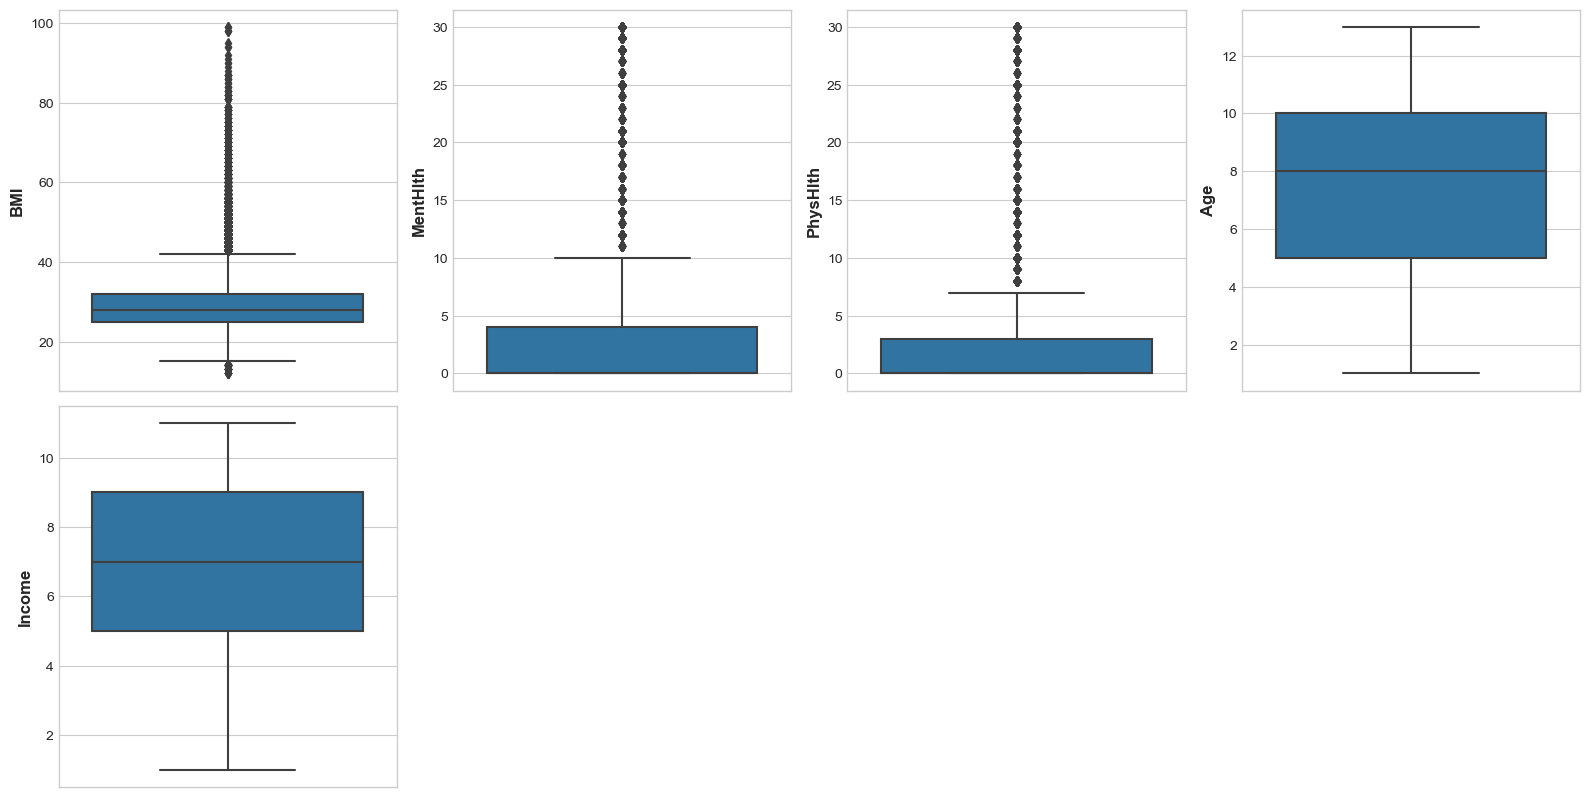

In [14]:
# boxplots of numerical features for outlier detection

def box(df):
    fig = plt.figure(figsize=(16,16))
    for i in range(len(num_cols.columns)):
        fig.add_subplot(4, 4, i+1)
        sns.boxplot(y=num_cols.iloc[:,i])
    plt.tight_layout()
    plt.show()
box(num_cols)  

## Distribution of the target variable

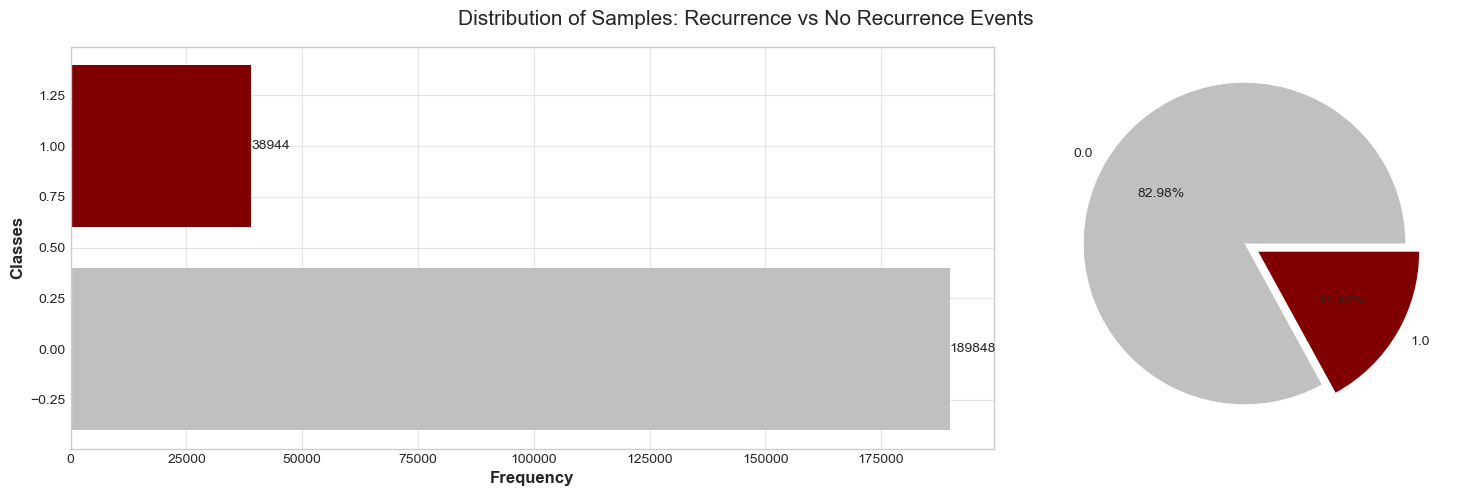

In [15]:
y = df['Diabetes_binary'].value_counts()
colors = ["Silver","maroon" ]
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})


axes[0].barh(y=y.index, width=y.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Classes')
axes[0].grid(alpha=0.5)
for index, values in enumerate(y):
    axes[0].text(values+1, index, str(values), va='center')

axes[1].pie(y.values, labels=y.index, autopct='%.2f%%', explode=([0.05]*len(y.index)), colors=colors)

    

figure.suptitle('Distribution of Samples: Recurrence vs No Recurrence Events', fontsize=15)
plt.tight_layout(pad=1)
plt.show()


## Distribution of Categorical variables

In [16]:
categorical_variables

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'DiffWalk',
 'Sex',
 'Education']

In [17]:
def plot_bar(df, cols):
    fig, axes = plt.subplots(6, 3, figsize=(15, 30), dpi=100)
    axes = axes.flatten()

    for i, col in enumerate(cols):
        counts = df[col].value_counts()
        counts.plot.bar(ax = axes[i],color= "#4477DA")
        axes[i].set_title("Distibution of " + col)
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()

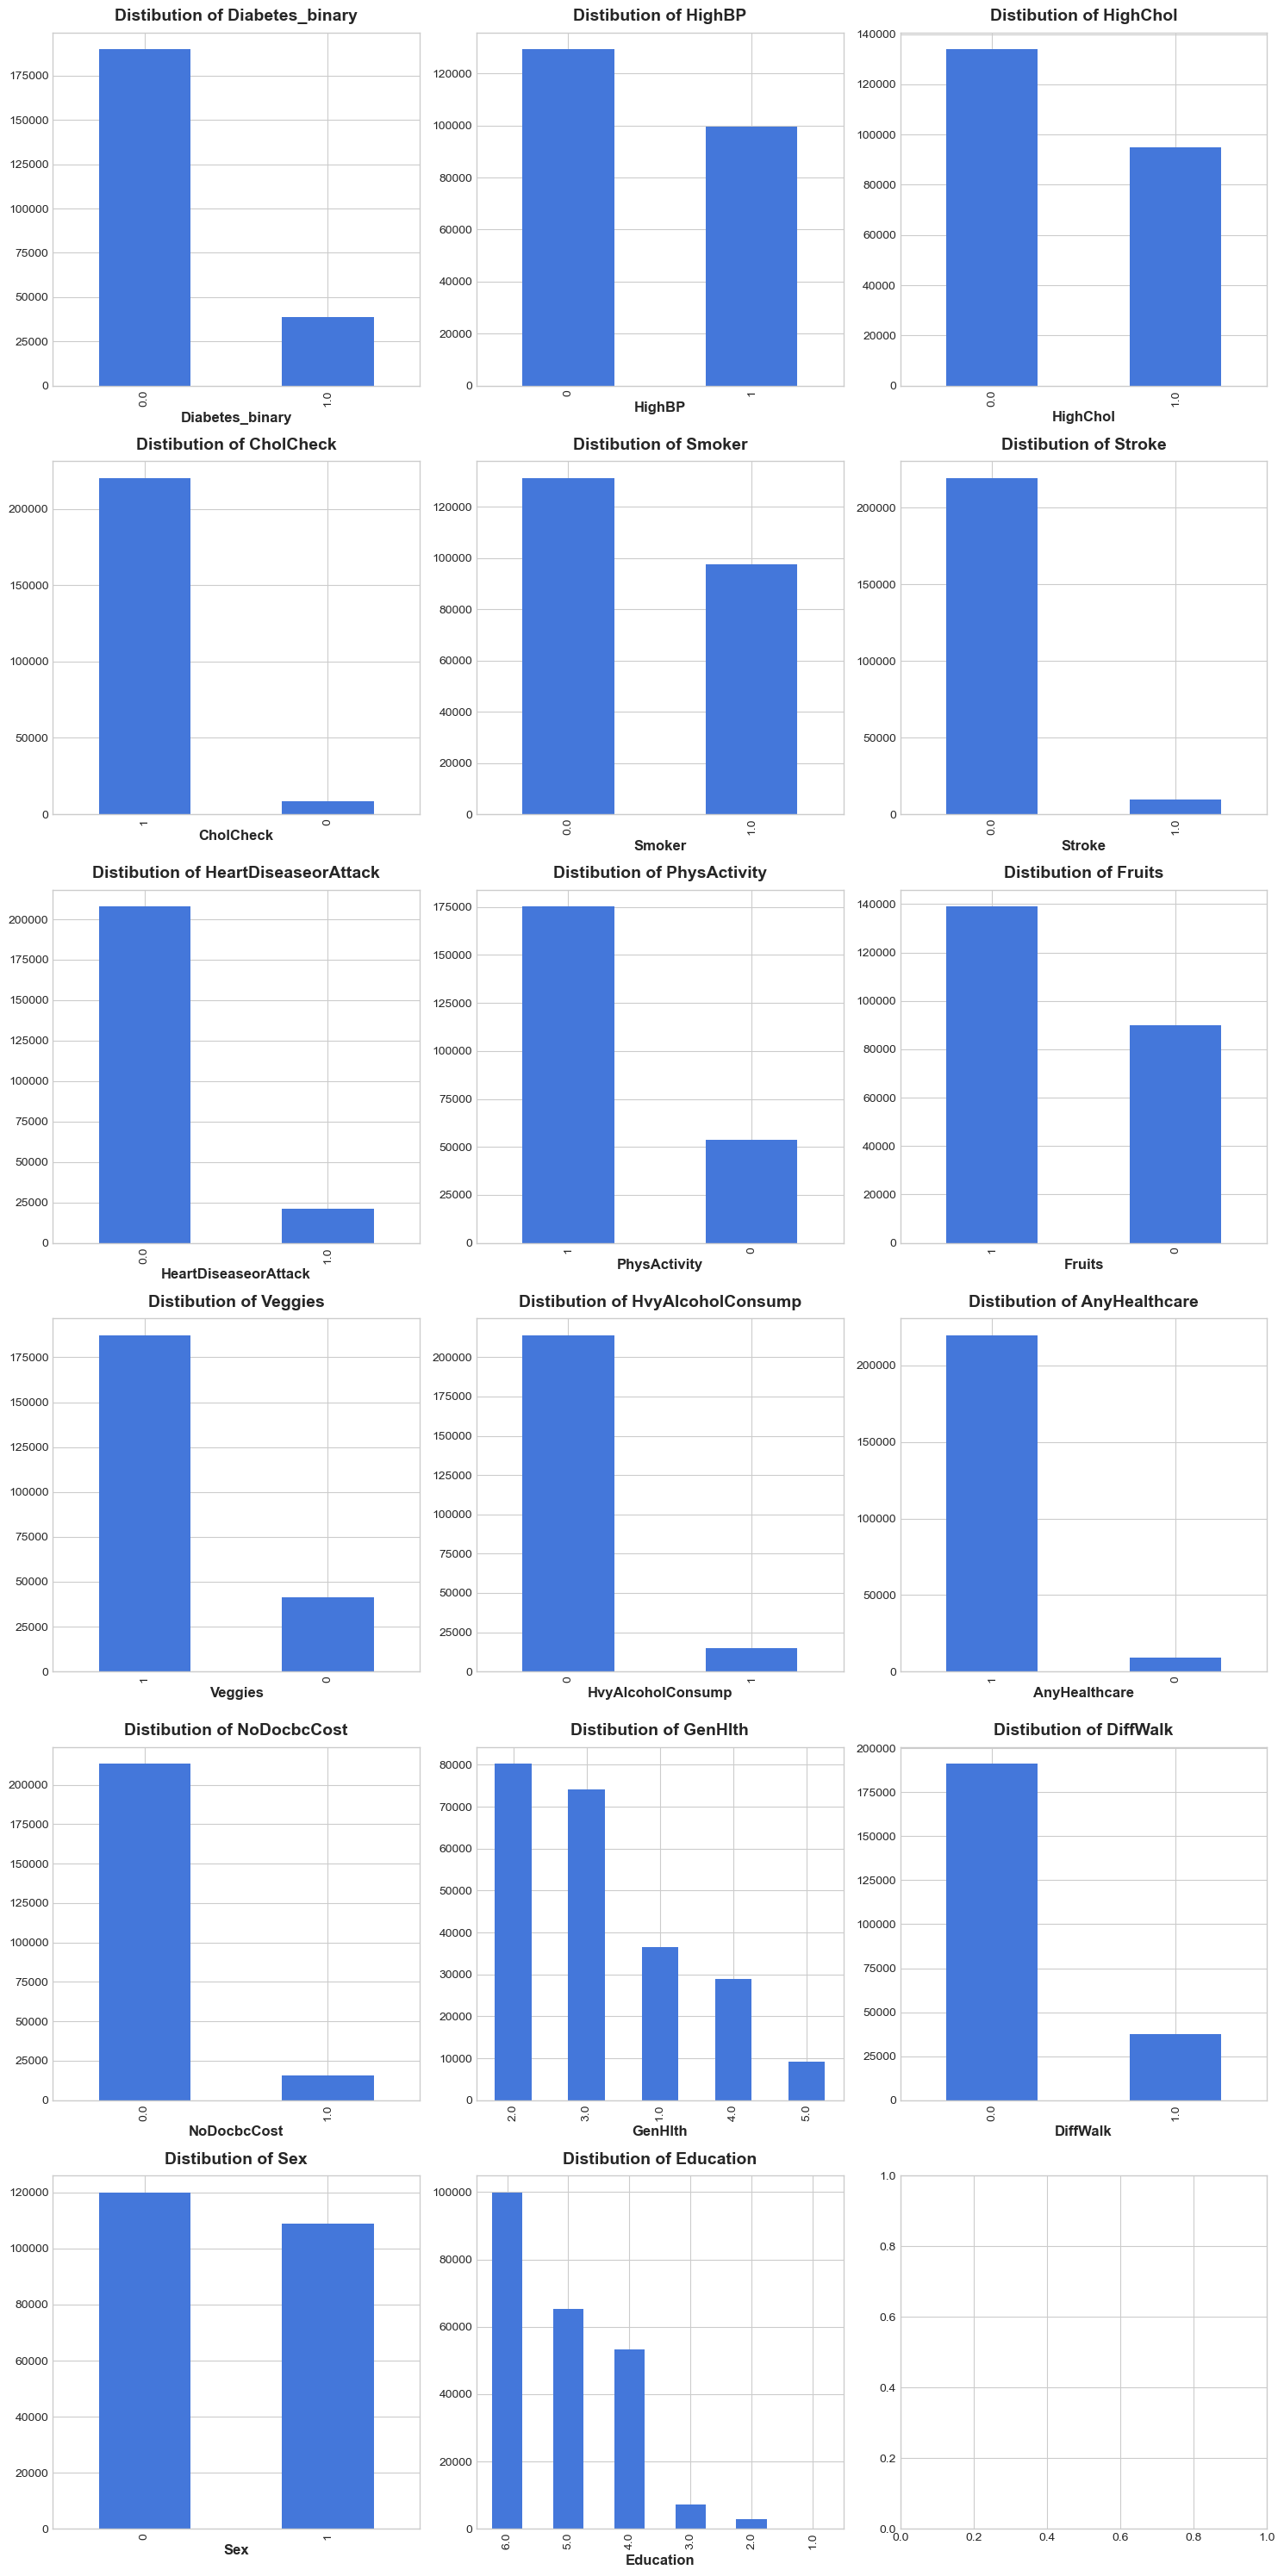

In [18]:
plot_bar(df, categorical_variables)

## Distribution of Numeric variables

<Axes: xlabel='Income', ylabel='Count'>

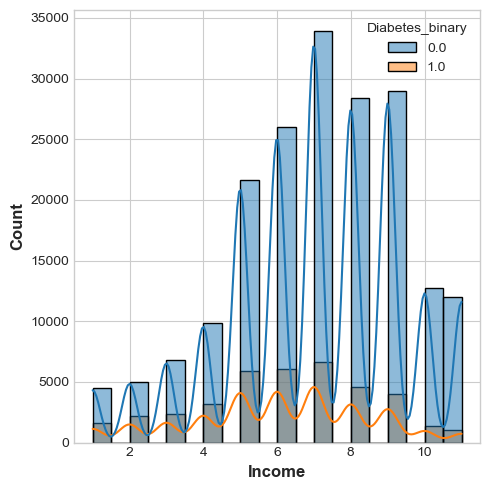

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
sns.histplot(
    data = df,
    x = df['Income'],
    hue = 'Diabetes_binary',
    kde = True,
    bins = 20
)

<Axes: xlabel='Age', ylabel='Count'>

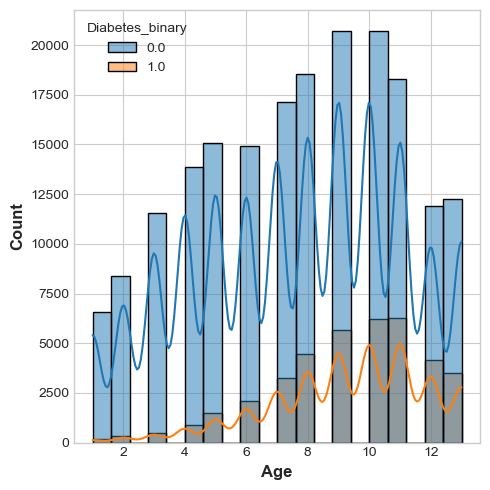

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
sns.histplot(
    data = df,
    x = df['Age'],
    hue = 'Diabetes_binary',
    kde = True,
    bins = 20
)

<Axes: xlabel='BMI', ylabel='Count'>

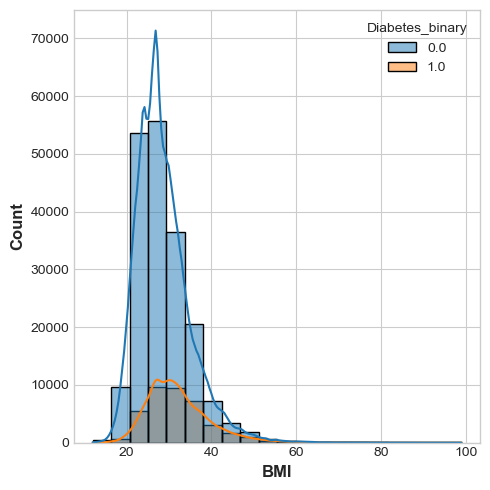

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
sns.histplot(
    data = df,
    x = df['BMI'],
    hue = 'Diabetes_binary',
    kde = True,
    bins = 20
)

<Axes: xlabel='MentHlth', ylabel='Count'>

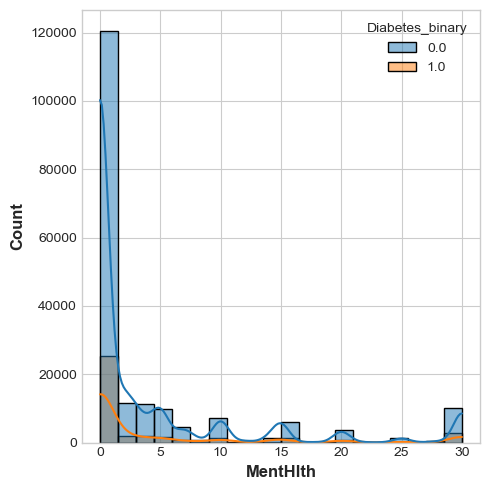

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
sns.histplot(
    data = df,
    x = df['MentHlth'],
    hue = 'Diabetes_binary',
    kde = True,
    bins = 20
)

<Axes: xlabel='PhysHlth', ylabel='Count'>

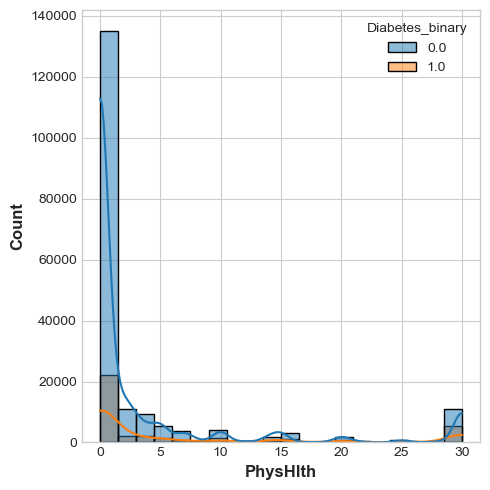

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
sns.histplot(
    data = df,
    x = df['PhysHlth'],
    hue = 'Diabetes_binary',
    kde = True,
    bins = 20
)

<h3> Visualizing the relationship between categoric variables and the target variable</h3>

In [24]:
cols = ['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','DiffWalk','Sex','Education']

In [25]:
def create_plot_pivot(data2, x_column):
    _df_plot = data2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

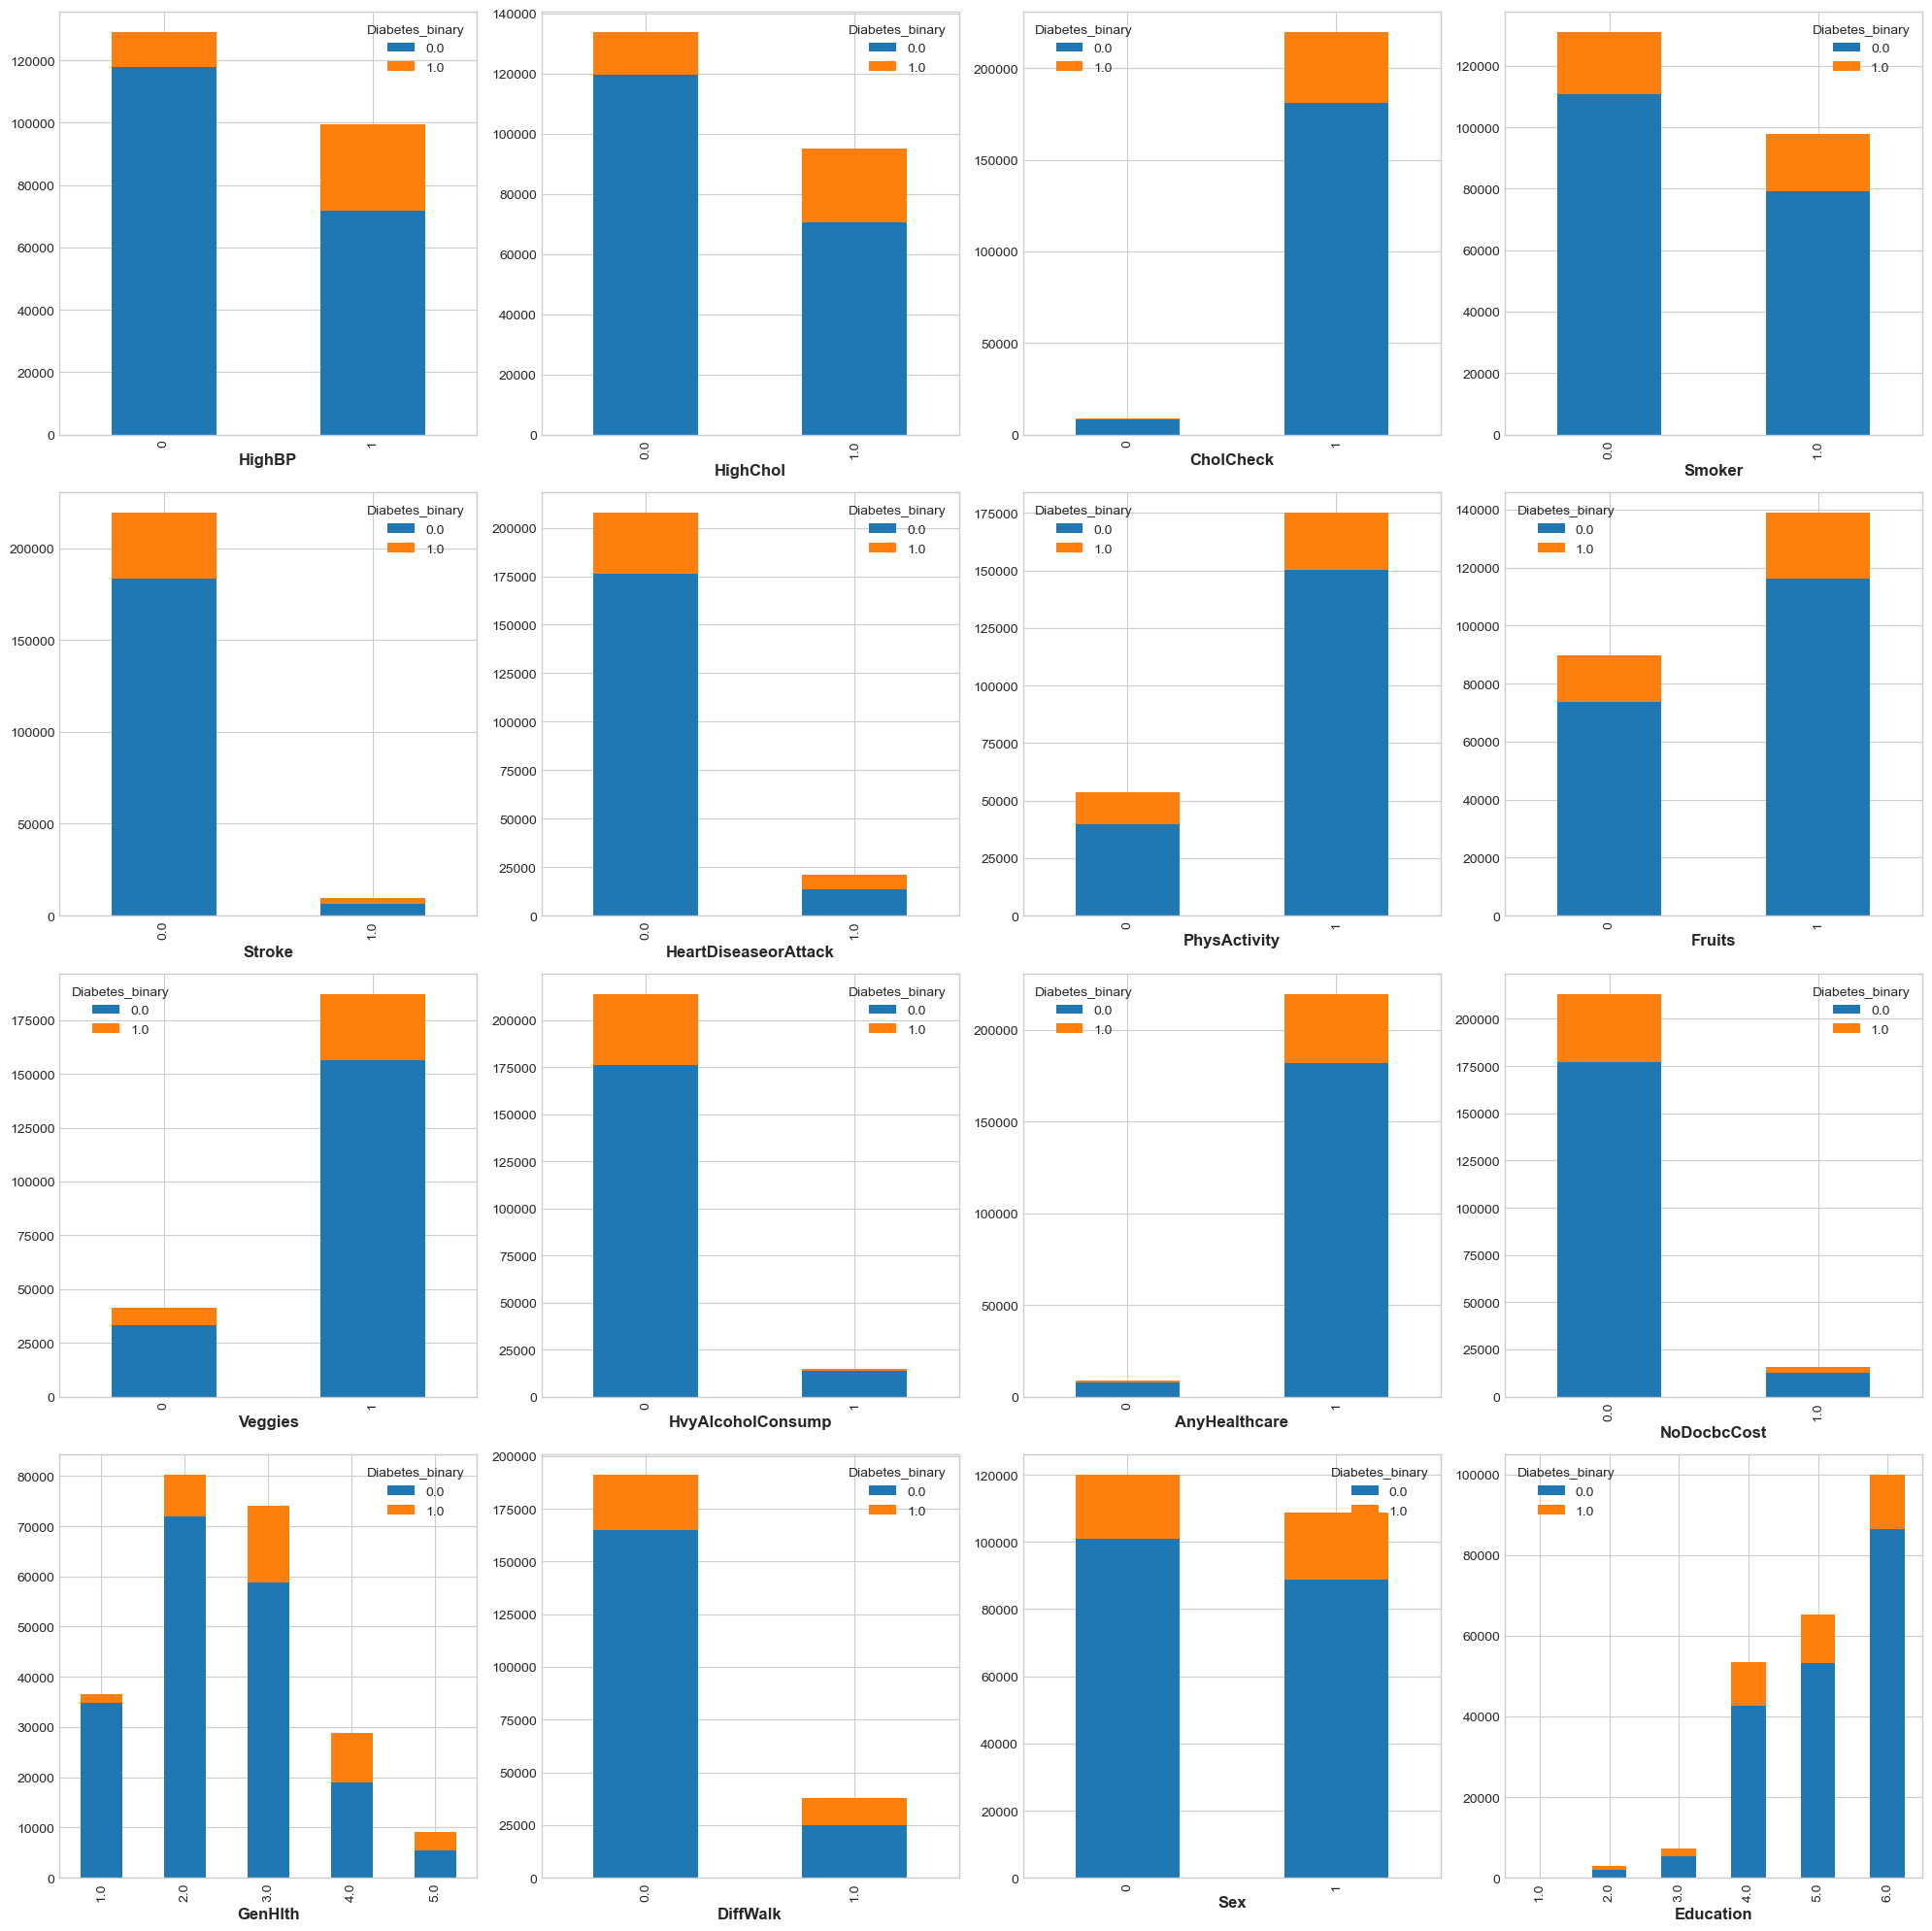

In [26]:
fig, ax = plt.subplots(4, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(df, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

## Correlation

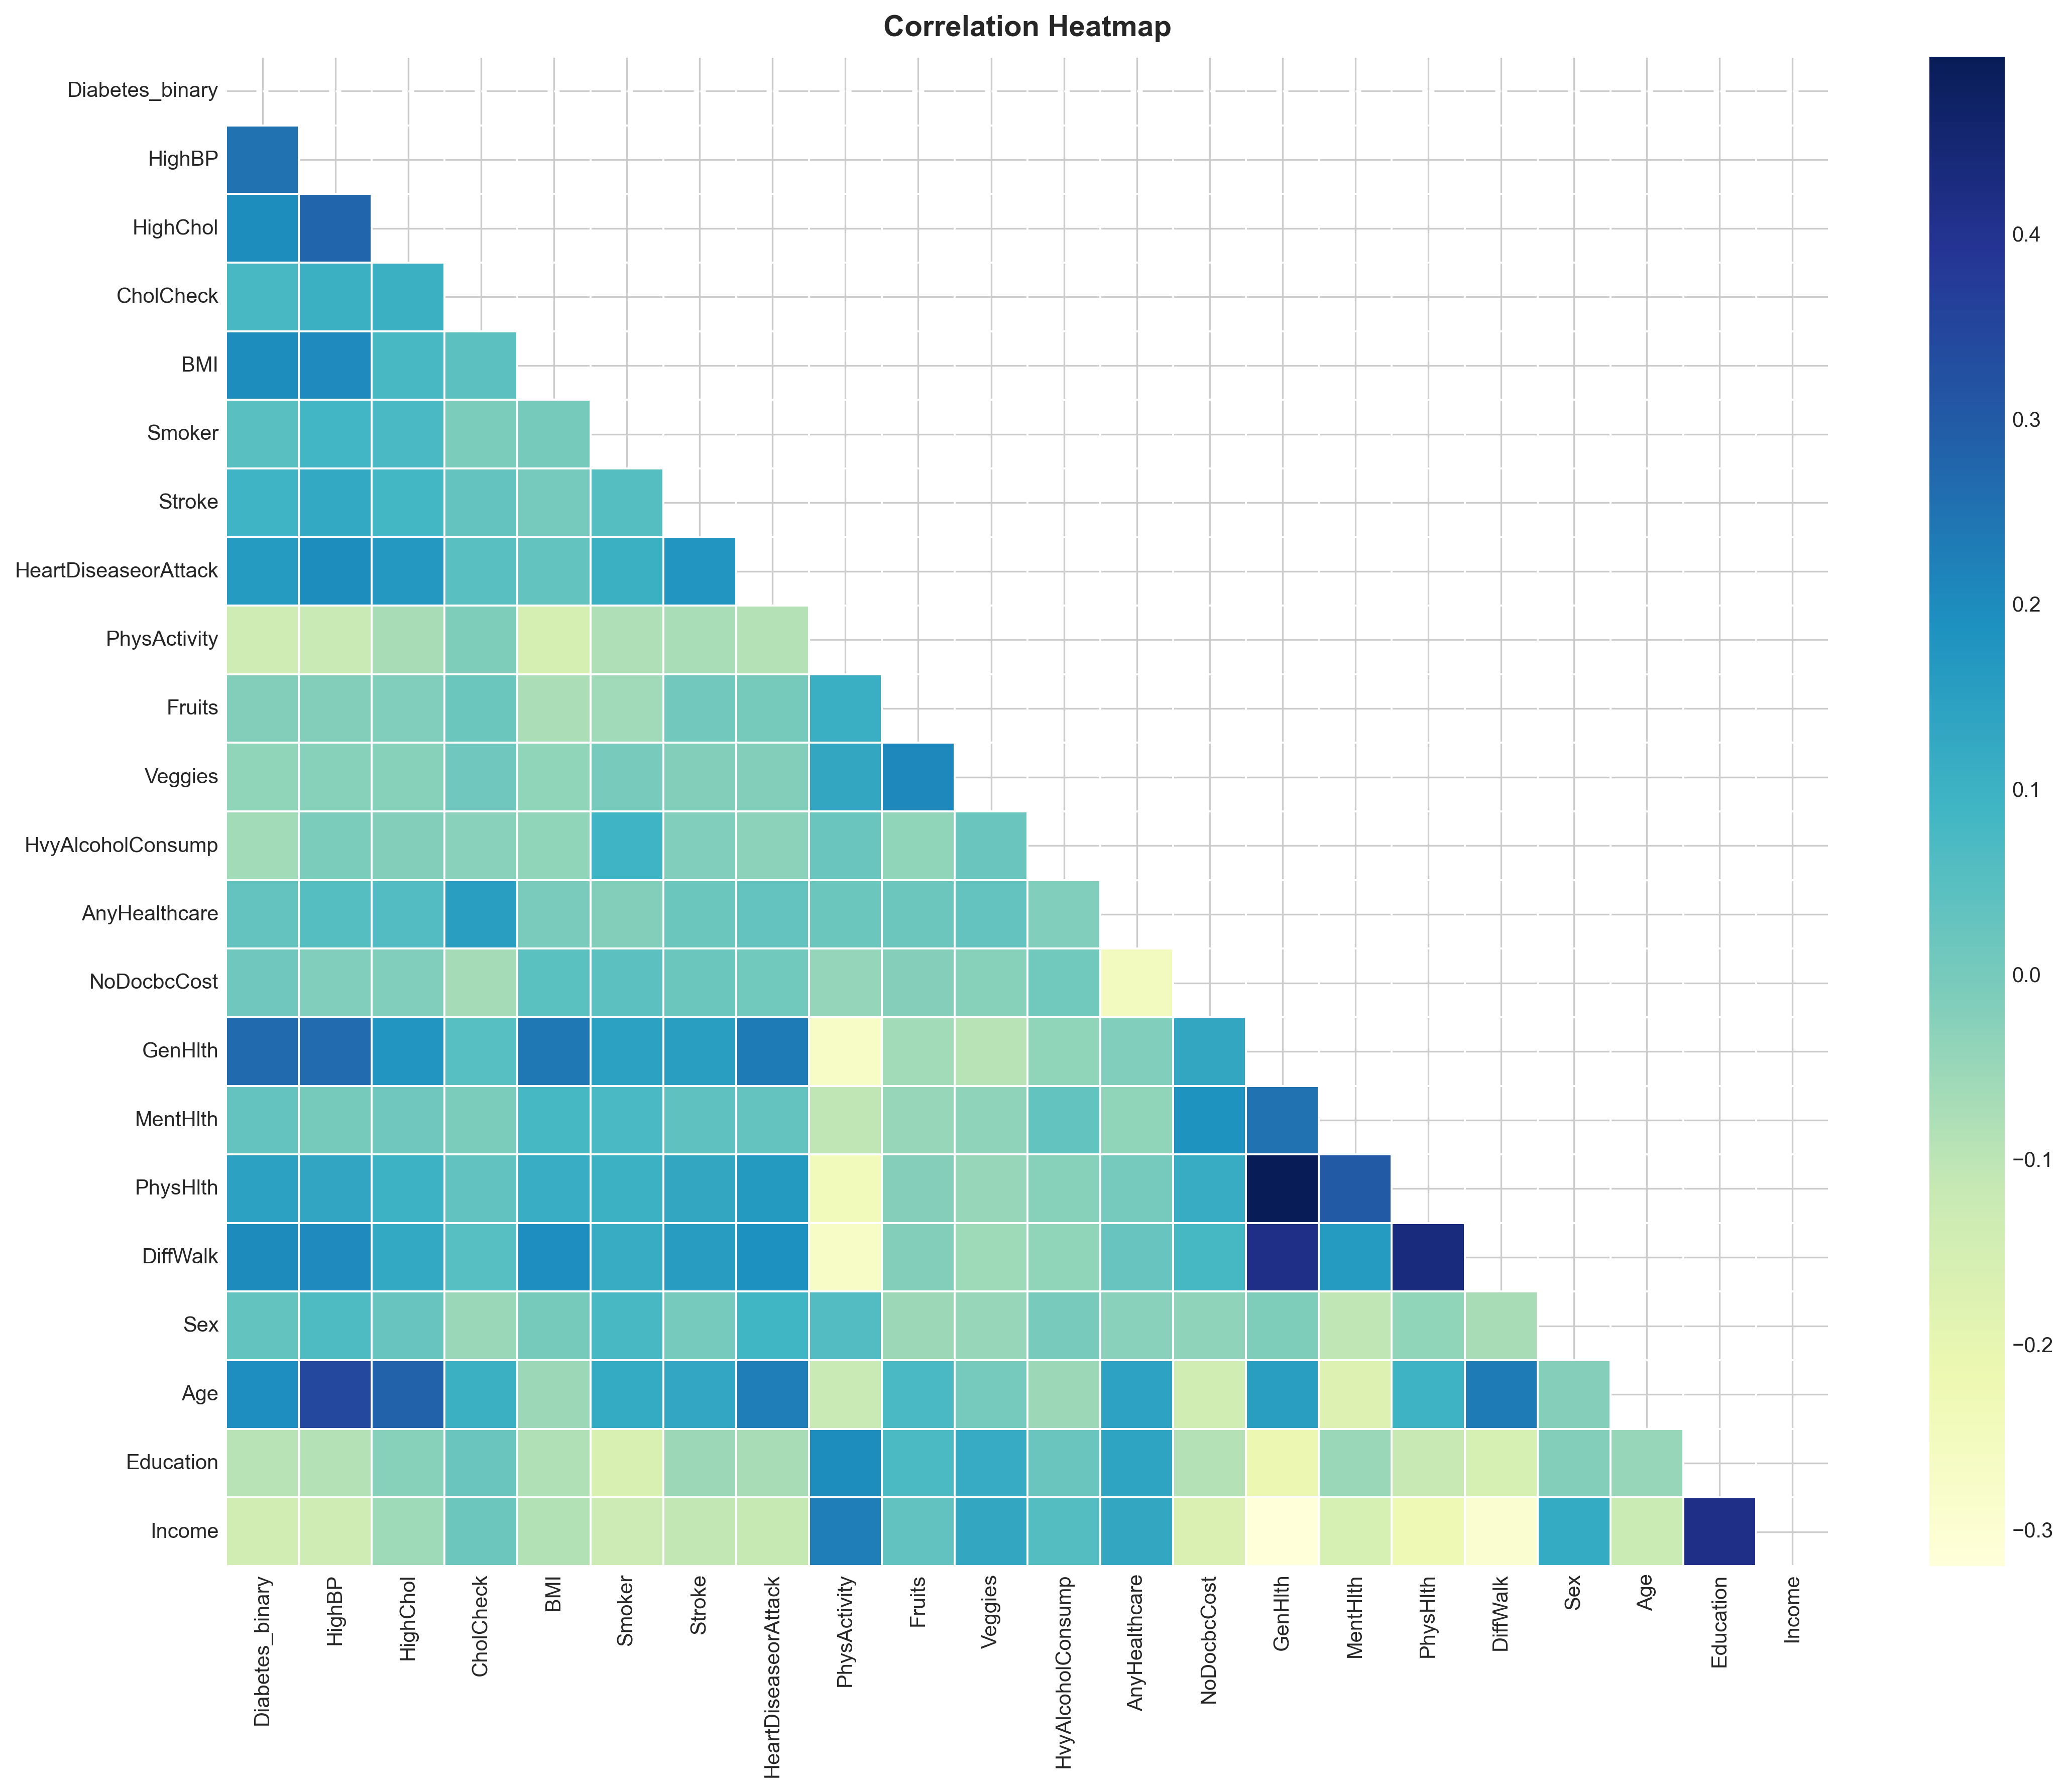

In [27]:
# Plot correlation heatmap
plt.figure(figsize=(15, 12), dpi=300)
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='YlGnBu', linewidth=.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [28]:
y_data = df["Diabetes_binary"]
x_data=df.drop("Diabetes_binary",axis=1)

In [29]:
correlation = x_data.corrwith(y_data)


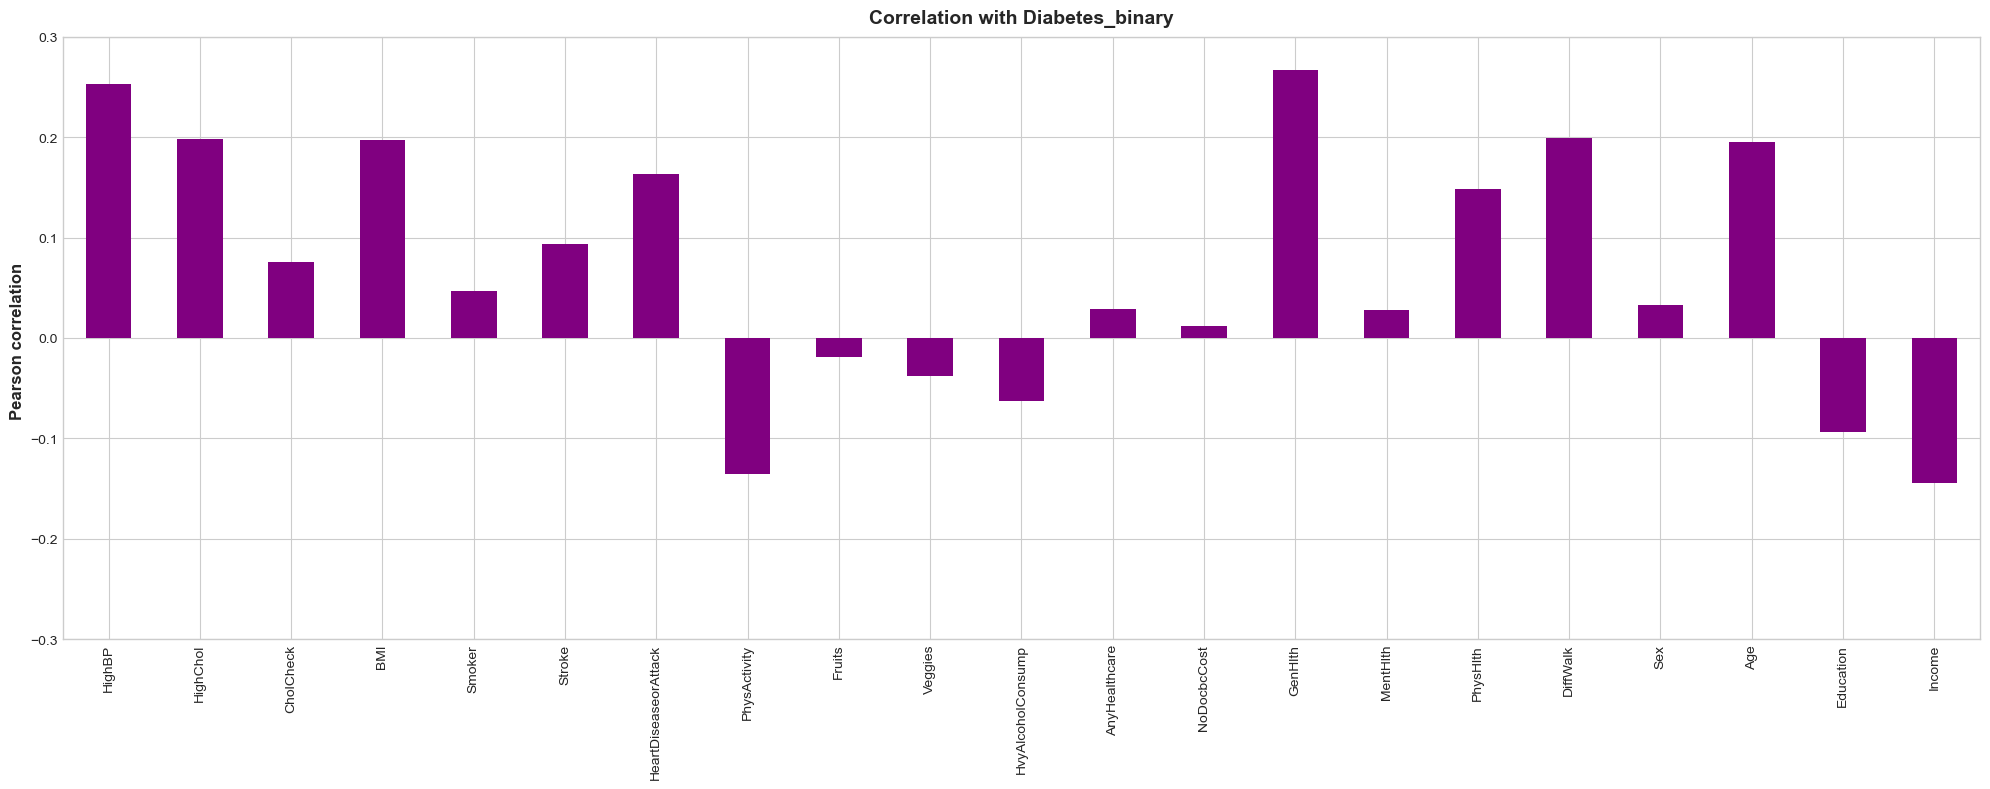

In [30]:
ax = correlation.plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary",color="Purple")
ax.set(ylim = [-0.3, 0.3],ylabel = "Pearson correlation ");

# Data Preprocessing

#### Handling class imbalance using downsampling of the majoraty class technique

In [47]:
import imblearn

In [ ]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x_data,y_data)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
df['Diabetes_binary'].value_counts()

In [ ]:
df_0 = df[df['Diabetes_binary']==0][:38944]
print("Shape: ", df_0.shape)
print("Diabetes_binary classes values count: ", df_0['Diabetes_binary'].value_counts())

In [34]:
df_1 = df[df['Diabetes_binary'] == 1]
print("Shape: ", df_1.shape)
print("Diabetes_binary classes values count: ", df_1['Diabetes_binary'].value_counts())

Shape:  (38944, 22)
Diabetes_binary classes values count:  1.0    38944
Name: Diabetes_binary, dtype: int64


In [35]:
df = pd.concat([df_0, df_1], axis=0)

#### features importance(Features utility scores)

In [39]:
y = df["Diabetes_binary"]
x=df.drop("Diabetes_binary",axis=1)

In [40]:
discrete_features = x.dtypes == int

In [41]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(x,y,discrete_features):
    mi_scores = mutual_info_classif(x,y,discrete_features =discrete_features )
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = x.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores
mi_scores =  make_mi_scores(x,y,discrete_features) 
mi_scores

HighBP                  0.049117
PhysActivity            0.046356
GenHlth                 0.043841
CholCheck               0.041738
AnyHealthcare           0.041192
Veggies                 0.035266
HighChol                0.034041
Fruits                  0.033076
Age                     0.027108
Sex                     0.023293
BMI                     0.023269
DiffWalk                0.020338
Smoker                  0.020188
Education               0.018908
Income                  0.013446
HeartDiseaseorAttack    0.010748
PhysHlth                0.010670
Stroke                  0.004757
HvyAlcoholConsump       0.004343
MentHlth                0.001963
NoDocbcCost             0.000000
Name: MI Scores, dtype: float64

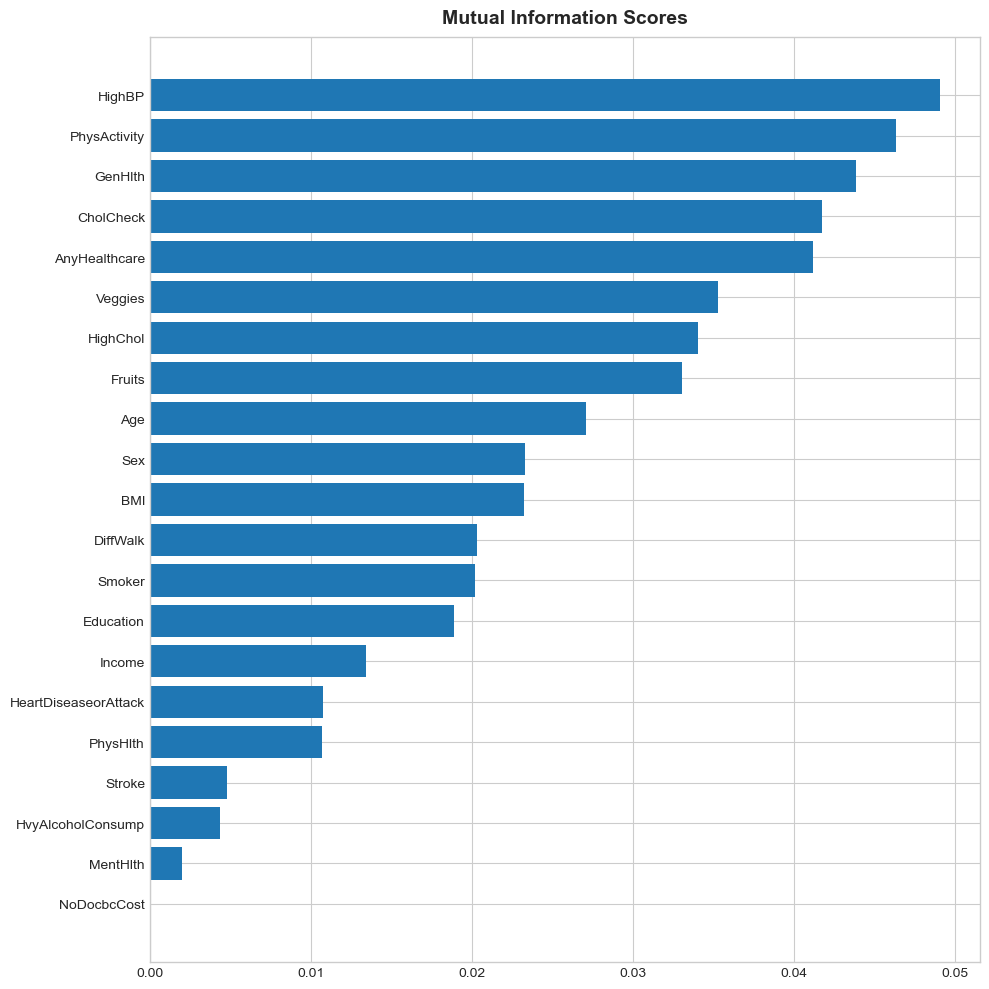

In [42]:
def plot_mi_scores(scores):
    fig, ax = plt.subplots(figsize=(10,10))
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
    
plot_mi_scores(mi_scores)

In [43]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.0]
x = drop_uninformative(x, mi_scores)

In [44]:
x.shape

(228792, 20)

In [45]:
x.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

## Train-Test split

In [46]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,shuffle =True)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 68638
number of training samples: 160154


## Features scaling

In [44]:
# X_train Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(df_scaled, columns = x_train.columns)
# x_test Scaling
df_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(df_scaled, columns = x_test.columns)
x_test.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
HighBP,23367.0,0.012,0.999,-1.059,-1.059,0.944,0.944,0.944
HighChol,23367.0,-0.005,1.000,-0.983,-0.983,-0.983,1.017,1.017
CholCheck,23367.0,0.002,0.993,-6.135,0.163,0.163,0.163,0.163
BMI,23367.0,0.006,1.009,-2.404,-0.707,-0.141,0.566,9.618
Smoker,23367.0,0.002,1.000,-0.883,-0.883,-0.883,1.133,1.133
Stroke,23367.0,0.001,1.003,-0.246,-0.246,-0.246,-0.246,4.071
HeartDiseaseorAttack,23367.0,0.009,1.009,-0.384,-0.384,-0.384,-0.384,2.607
PhysActivity,23367.0,0.000,1.000,-1.636,-1.636,0.611,0.611,0.611
Fruits,23367.0,0.003,0.999,-1.236,-1.236,0.809,0.809,0.809
Veggies,23367.0,-0.005,1.004,-2.071,0.483,0.483,0.483,0.483


# Modelling

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score

## Helping functions

### Plotting Confusion Matrix and Classification Report

In [46]:
from sklearn import metrics

In [47]:
def clf_plot(y_pred) :

    cm = metrics.confusion_matrix(y_test, y_pred,normalize='true')
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left: Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap='YlGnBu', ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=20)
    ax[0].xaxis.set_ticklabels(['No Diabetes_binary','Diabetes_binary'])
    ax[0].yaxis.set_ticklabels(['No Diabetes_binary','Diabetes_binary'])

    # Right: Classification Report
    ax[1] = sns.heatmap(cr, cmap='YlGnBu', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=20)
    plt.show()

### Plotting roc_curve

In [48]:
from sklearn.metrics import roc_curve, auc

def roc(model,y_pred):
    # Predict the probabilities of the positive class
    y_pred = model.predict_proba(x_test)[:,1]
    y_pred.shape

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Calculate the AUC score
    auc_score = auc(fpr, tpr)
    x1=np.linspace(0,1,100)
    # Plot the ROC curve
    fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % auc_score)
    plt.plot(x1,x1,label='baseline')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve for binary classification")
    plt.legend()
    plt.show()

## Random Forest Classifier

In [49]:
# RFC


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=22, n_estimators=100, random_state=1).fit(x_train, y_train)
y_val_pred1 = rfc.predict(x_test)

print(f'Precision: {precision_score(y_test, y_val_pred1)}')
print(f'Recall: {recall_score(y_test, y_val_pred1)}')
print(f'F1-Score: {f1_score(y_test, y_val_pred1)}')
print(f'AUROC: {roc_auc_score(y_test, y_val_pred1)}')


Precision: 0.7151783595665586
Recall: 0.7755382108242559
F1-Score: 0.7441362850794173
AUROC: 0.7339853677968221


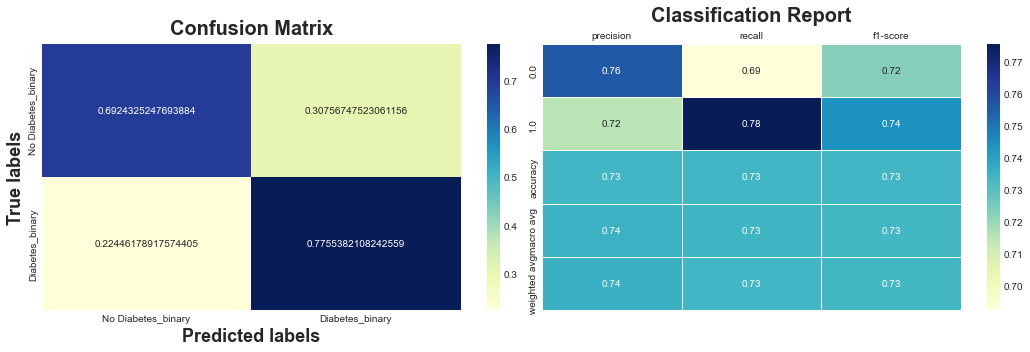

In [50]:
clf_plot(y_val_pred1)

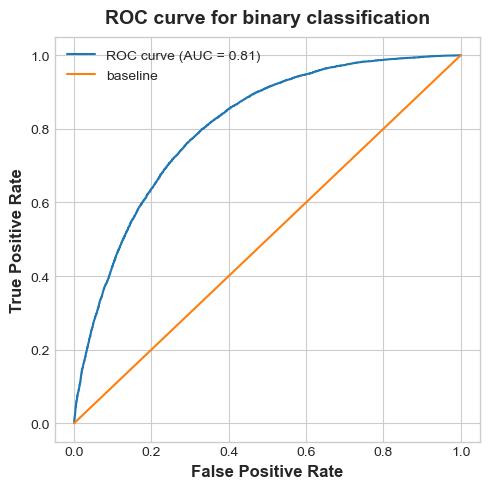

In [51]:
roc(rfc,y_val_pred1)

## KNeighbors Classifier

In [52]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(x_train, y_train)
y_val_pred2 = knn.predict(x_test)

print(f'Precision: {precision_score(y_test, y_val_pred2)}')
print(f'Recall: {recall_score(y_test, y_val_pred2)}')
print(f'F1-Score: {f1_score(y_test, y_val_pred2)}')
print(f'AUROC: {roc_auc_score(y_test, y_val_pred2)}')

Precision: 0.6925754999595174
Recall: 0.7336821339737541
F1-Score: 0.7125364431486879
AUROC: 0.7046869843083667


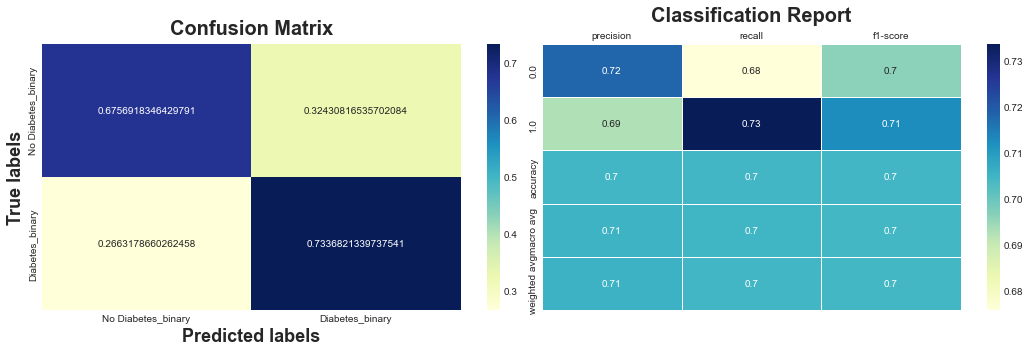

In [53]:
clf_plot(y_val_pred2)

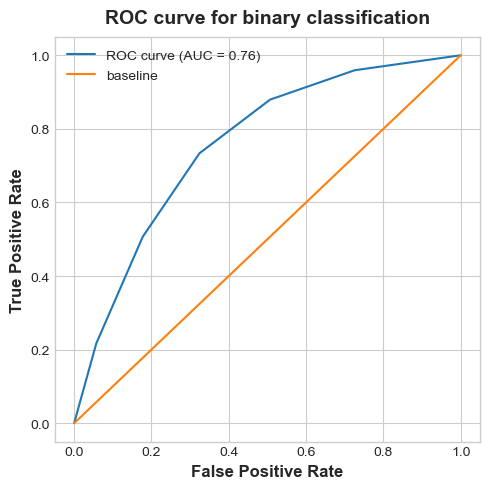

In [54]:
roc(knn,y_val_pred2)

## Logistic Regression

In [55]:
# Train Log Regression
lr = LogisticRegression(max_iter=400).fit(x_train, y_train)
y_val_pred3 = lr.predict(x_test)
## Classification Report for validation set



print(f'Precision: {precision_score(y_test, y_val_pred3)}')
print(f'Recall: {recall_score(y_test, y_val_pred3)}')
print(f'F1-Score: {f1_score(y_test, y_val_pred3)}')
print(f'AUROC: {roc_auc_score(y_test, y_val_pred3)}')

Precision: 0.7312684850476503
Recall: 0.763444549275238
F1-Score: 0.7470101968024841
AUROC: 0.7420314649348516


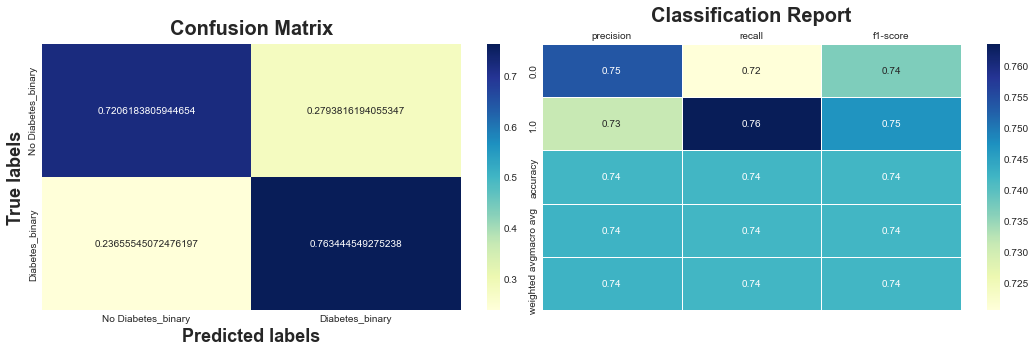

In [56]:
clf_plot(y_val_pred3)

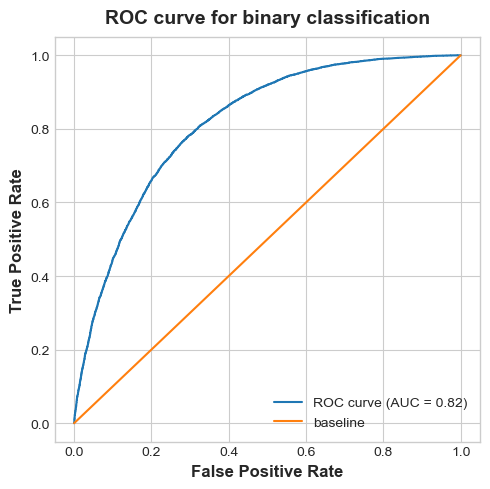

In [57]:
roc(lr,y_val_pred3)

## GaussianNB

In [58]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_val_pred4 =model.predict(x_test)

In [59]:
print(f'Precision: {precision_score(y_test, y_val_pred4)}')
print(f'Recall: {recall_score(y_test, y_val_pred4)}')
print(f'F1-Score: {f1_score(y_test, y_val_pred4)}')
print(f'AUROC: {roc_auc_score(y_test, y_val_pred4)}')

Precision: 0.7165991902834008
Recall: 0.7135260313920576
F1-Score: 0.7150593089221249
AUROC: 0.7162607949922366


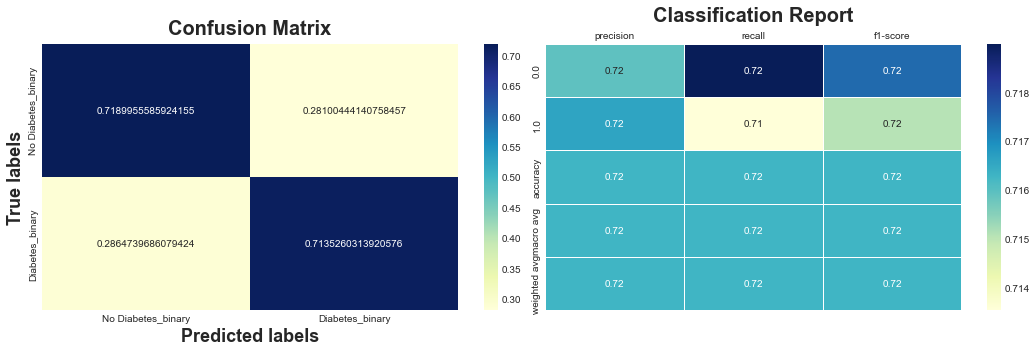

In [60]:
clf_plot(y_val_pred4)

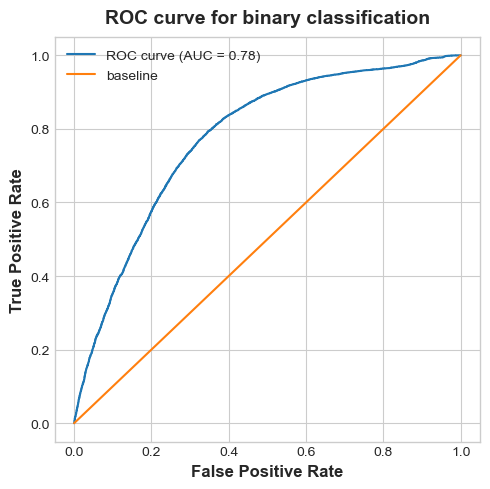

In [61]:
roc(model,y_val_pred4)

## Conclusion

### Comparing models performance

In [62]:
def measure_error(y_valid, y_val_pred, label):
    return pd.Series({"Accuracy": accuracy_score(y_valid, y_val_pred),
                     "Precision": precision_score(y_valid, y_val_pred),
                     "Recall": recall_score(y_valid, y_val_pred),
                     "F1": f1_score(y_valid, y_val_pred),
                     "AUROC": roc_auc_score(y_valid, y_val_pred)}, 
                     name = label)

In [63]:
RFC = pd.concat([measure_error(y_test, y_val_pred1,"RFC")],axis = 1)
KNN = pd.concat([measure_error(y_test, y_val_pred2,"KNN")],axis = 1)
Log_reg = pd.concat([measure_error(y_test, y_val_pred3,"Log_reg")],axis = 1)
GaussianNB = pd.concat([measure_error(y_test, y_val_pred4,"GaussianNB")],axis = 1)

In [65]:
compare_models =  pd.concat([RFC,KNN,Log_reg,GaussianNB],axis =1)
compare_models.style.background_gradient(cmap='Blues')

,RFC,KNN,Log_reg,GaussianNB
Accuracy,0.733898,0.704626,0.741987,0.716267
Precision,0.715178,0.692575,0.731268,0.716599
Recall,0.775538,0.733682,0.763445,0.713526
F1,0.744136,0.712536,0.747010,0.715059
AUROC,0.733985,0.704687,0.742031,0.716261


## Result :

### Based on the above output, best algorithm base on F1 Score is : Logistic Regression

---
END

Thank you :)